## Subject 2: Purchasing power of English workers from the 16th to the 19th century

William Playfair was one of the pioneers of the graphical presentation of data, being credited in particular with the invention of the histogram. One of his famous graphs, taken from his book ["A Letter on Our Agricultural Distresses, Their Causes and Remedies"](https://books.google.fr/books/about/A_Letter_on_Our_Agricultural_Distresses.html?id=aQZGAQAAMAAJ), shows [the evolution of the wheat price and average salaries from 1565 to 1821](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png). Playfair did not publish his raw data because reproducibility was not yet a topic in his days. But [numbers obtained from a scan of the graph](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) are available for download, the [CSV version](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) being most convenient.

A few remarks for understanding the data:
- Until 1971, the pound sterling was divided into 20 shillings, and a shilling into 12 pence.
- The wheat price is given in shillings per quarter, a quarter being 15 British pounds or about 6,8 kg.
- Salaries are given in shillings per week.

### Data Loading and Pre-Processing
First we import the libraries that we are going to use. Then, we load the data (from the URL or our local file). Finally, we exclude missing data points.

In [1]:
# First of all, the version of Pandas provided by MOOC was 0.22.0
# However, we need a version that is higher or equal to version 0.24.1
# So, we upgrade our pandas installation
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.0.3)


In [2]:
# ------------ Imports ------------ #
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection

# Now lets print the version of the libraries that we use in this notebook
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Pandas version: 1.0.3
Numpy version: 1.15.2
Matplotlib version: 2.2.3


In [3]:
# ------------ Read the data ------------ #
# Define url of dataset, local file path, and which columns will be read from the dataset
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
local_file = "./Wheat.csv" # Set the path of the local file
cols_to_read = ['Year','Wheat', 'Wages'] # We will read only the columns (year, wheat and wages), the index column is not useful

try:
    data = pd.read_csv(local_file, usecols=cols_to_read) # Try to read local file
    
except FileNotFoundError: # If it was not found, we download the file from data_url and save it into a local file
    data = pd.read_csv(data_url, usecols=cols_to_read)
    data.to_csv(local_file)
    print("Data downloaded on date:", date.today()) # Print the date that the dataset was downloaded

# Remove last row of the dataframe
# Why? -> For the entire dataset, there is a 5-years gap between each data point, the last one is only one year 
# after the previous data point and the WHEAT price value is the same as the previous year. 
# On the other hand, we leave the two previous data points with no value for Wages since it provides relevant 
# information to show trends regarding the Wheat price considering the 5-years gap between data points.
n = 1 # Number of rows to delete, starting from the tail of the dataframe
data.drop(data.tail(n).index,inplace=True)

# Show the full dataset
data

Year  Wheat  Wages
0   1565   41.0   5.00
1   1570   45.0   5.05
2   1575   42.0   5.08
3   1580   49.0   5.12
4   1585   41.5   5.15
5   1590   47.0   5.25
6   1595   64.0   5.54
7   1600   27.0   5.61
8   1605   33.0   5.69
9   1610   32.0   5.78
10  1615   33.0   5.94
11  1620   35.0   6.01
12  1625   33.0   6.12
13  1630   45.0   6.22
14  1635   33.0   6.30
15  1640   39.0   6.37
16  1645   53.0   6.45
17  1650   42.0   6.50
18  1655   40.5   6.60
19  1660   46.5   6.75
20  1665   32.0   6.80
21  1670   37.0   6.90
22  1675   43.0   7.00
23  1680   35.0   7.30
24  1685   27.0   7.60
25  1690   40.0   8.00
26  1695   50.0   8.50
27  1700   30.0   9.00
28  1705   32.0  10.00
29  1710   44.0  11.00
30  1715   33.0  11.75
31  1720   29.0  12.50
32  1725   39.0  13.00
33  1730   26.0  13.30
34  1735   32.0  13.60
35  1740   27.0  14.00
36  1745   27.5  14.50
37  1750   31.0  15.00
38  1755   35.5  15.70
39  1760   31.0  16.50
40  1765   43.0  17.60
41  1770   47.0  18.50
42  1775   44.0  19.50
43  1780   46.0  21.00
44  1785   42.0  23.00
45  1790   47.5  25.50
46  1795   76.0  27.50
47  1800   79.0  28.50
48  1805   81.0  29.50
49  1810   99.0  30.00
50  1815   78.0    NaN
51  1820   54.0    NaN

### Exercise 1
Your first task is to reproduce Playfair's graph from the numerical data. Like Playfair, represent the wheat price by bars and the salaries by a blue surface delimited by a red curve. Superpose them in a single graphic. Apart from these criteria, the style of your graphic may differ from the original, but the overall impression it leaves should be the same.

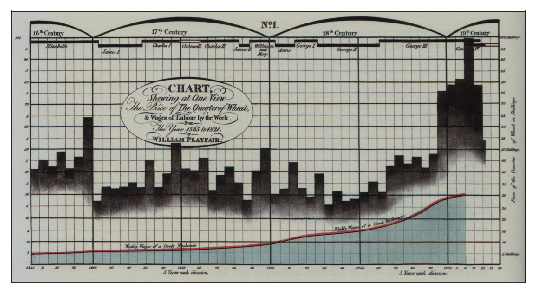

In [4]:
# ------------ Original Playfair Figure ------------ #
# Lets first see how the original Playfair graph looks like
a = plt.imread("https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png")
plt.figure(figsize=(20, 5))
plt.tick_params(axis='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.imshow(a)
plt.show()

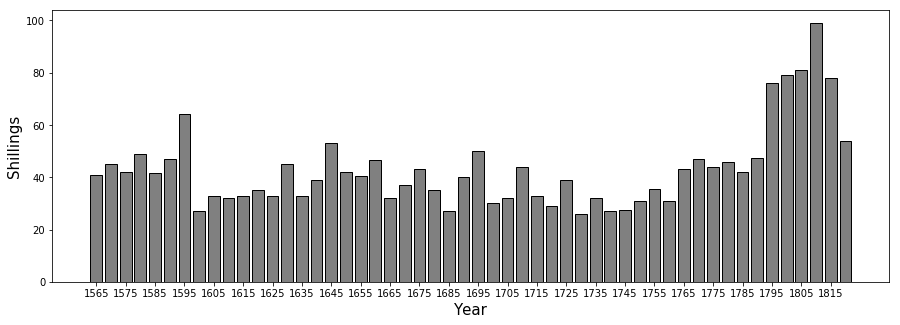

In [5]:
# ------------ Plot the WHEAT (shillings/quarter) per YEAR using a bar graph ------------ #
plt.figure(figsize=(15, 5))
plt.bar(data['Year'], data['Wheat'], width=4, align='center', color='gray', edgecolor='black')
plt.xticks(np.arange(min(data['Year']), max(data['Year']), 10))
plt.ylabel('Shillings', size=15)
plt.xlabel('Year', size=15)
plt.show()

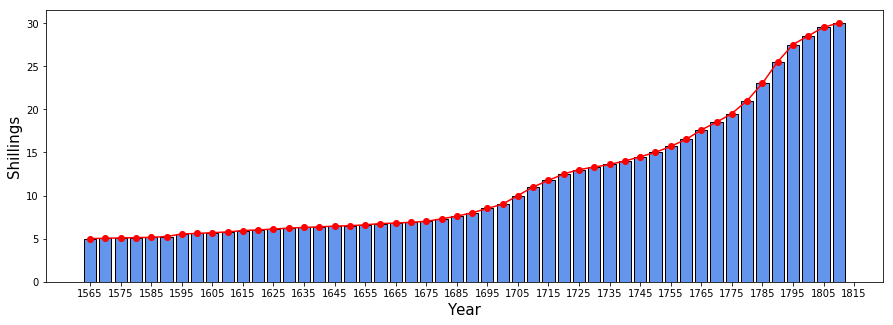

In [6]:
# ------------ Plot the WAGES (shillings/week) per YEAR using a bar graph and a red line ------------ #
plt.figure(figsize=(15, 5))
plt.bar(data['Year'], data['Wages'], width=4, align='center', color='cornflowerblue', edgecolor='black')
plt.plot(data['Year'], data['Wages'], 'o-', color='red')
plt.xticks(np.arange(min(data['Year']), max(data['Year']), 10))
plt.ylabel('Shillings', size=15)
plt.xlabel('Year', size=15)
plt.show()

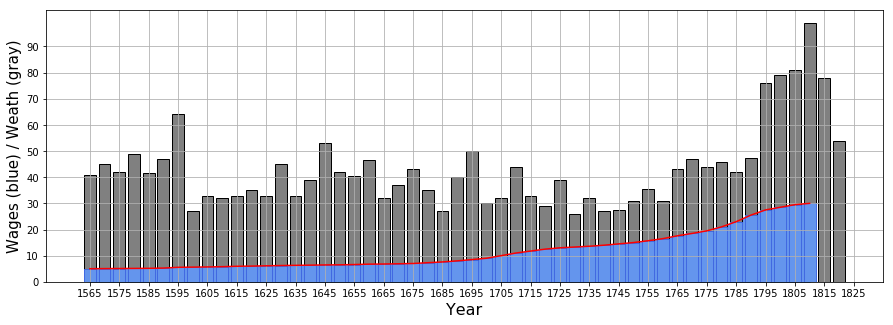

In [7]:
# ------------ Plot both graphs in a single figure ------------ #
# Here we integrate the previous two figures into a single one
plt.figure(figsize=(15, 5))

# Plot Year/Wheat bars
plt.bar(data['Year'], data['Wheat'], width=4, align='center', color='gray', edgecolor='black')

# Plot Year/Wages area using a bar graph and the fill_between function of matplotlib
plt.bar(data['Year'], data['Wages'], width=4, align='center', color='cornflowerblue', edgecolor='royalblue')
plt.fill_between(data['Year'], data['Wages'], color='cornflowerblue')

# Plot Year/Wages red line
plt.plot(data['Year'], data['Wages'], '-', color='red')

# Set the labels of the coordinates X and Y, and the intervals of the ticks
plt.xlabel('Year', size=16)
plt.ylabel('Wages (blue) / Weath (gray)', size=15)
plt.xticks(np.arange(min(data['Year']), max(data['Year'])+10, 10))
plt.yticks(np.arange(0, max(data['Wheat']), 10))

# Set a grid
plt.grid(which='both')

# Show figure
plt.show()

The Figure shows that, indeed, the purchase power has improved over time for the workers, with the Wages becoming higher with the flow of time. The Weath price, on the other hand, seems stable in general although it started to increase in 1795.

### Exercise 2
Next, improve the presentation of the data. For a start, Playfair has combined two quantities in a single graph by simplifying the units "shillings per quarter" and "shillings per week" to a plain "shillings", something that is no longer acceptable today. Use two different ordinate axes, one on the left and one on the right, and label them with the correct units. At this occasion, don't hesitate to use representations different from bars and curve-delimited surfaces for the two datasets if you consider this pertinent.

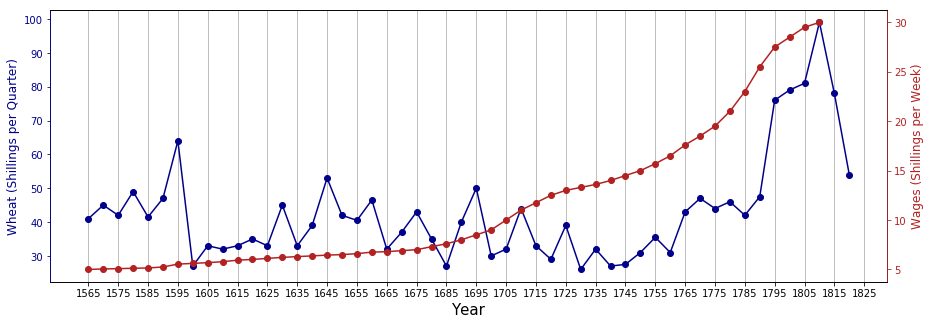

In [8]:
# ------------ Improved data representation ------------ #
# We use plot two lines with different scales on the left and right ordinate axes
# Left axis is for Wheat per Year (BLUE)
# Right axis is for Wages per Year (RED)

# First define the colors of the lines
color1 = 'darkblue'
color2 = 'firebrick'

# Wheat per Year (BLUE)
# Init figure, and define ticks, labels and grid settings
fig, ax1 = plt.subplots(figsize=(15, 5))
plt.xticks(np.arange(min(data['Year']), max(data['Year']+10), 10))
ax1.grid(axis='x')
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Wheat (Shillings per Quarter)', size=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
for t in ax1.yaxis.get_ticklines(): t.set_color(color1)
    
# Plot the Wheat per Year line
ax1.plot(data['Year'], data['Wheat'], 'o-', color=color1)

# Wages per Year (RED)
# Init second figure, and define ticks, label and spines settings
ax2 = ax1.twinx()
ax2.set_ylabel('Wages (Shillings per Week)', size=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.spines['right'].set_color(color2)
ax2.spines['left'].set_color(color1)
for t in ax2.yaxis.get_ticklines(): t.set_color(color2)
    
# Plot the Wages per Year line
ax2.plot(data['Year'], data['Wages'], 'o-', color=color2)

# Show final figure
plt.show()

With the use of two different ordinate axis, the comparison between measures is clearer. The Figure shows that Wages have ben growing whilst the Wheat price has been more stable, although with some oscillations until a big grow in 1795. It is relevant to point out that both, Wheat price and Wages, reached their top values during the same year (1810). However, the absence of data of the Wages for the next 10 years does not allow to see if it continued growing during the next years.

### Exercise 3
Playfair's goal was to show that the workers' purchasing power had increased over time. Try to make this feature stand out better. Make a plot of the purchasing power, defined as the quantity of wheat a worker can buy with a weekly salary, as a function of time. In another plot, show the two quantities (wheat price, salary) on two different axes, without an explicit time axis. Find another way to show the advancement of time in this plot. Which data representation seems clearest to you? Don't hesitate to propose other ones.

In [9]:
# ------------ Initial calculation ------------ #
# First we define the purchasing power (Wages/Wheat), and we add it to the data frame
data['Purchasing Power'] = data['Wages'] / data['Wheat']
data.head()

Year  Wheat  Wages  Purchasing Power
0  1565   41.0   5.00          0.121951
1  1570   45.0   5.05          0.112222
2  1575   42.0   5.08          0.120952
3  1580   49.0   5.12          0.104490
4  1585   41.5   5.15          0.124096

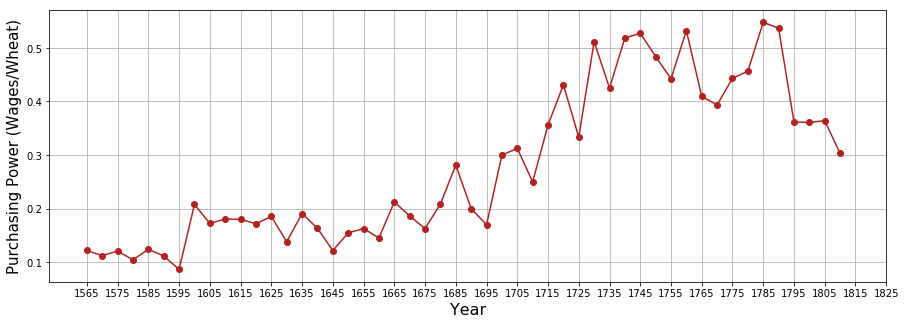

In [10]:
# ------------ Purchasing Power per Year ------------ # 
# Make a plot of the purchasing power, defined as the quantity of wheat 
# a worker can buy with a weekly salary, as a function of time.

# Set color
color1 = 'firebrick'

# Init figure, and define ticks, labels and grid settings
plt.figure(figsize=(15, 5))

# Plot Year/Purchasing Power Line
plt.plot(data['Year'], data['Purchasing Power'], 'o-', color=color1)

# Set the labels of the coordinates X and Y, and the intervals of the ticks
plt.xlabel('Year', size=16)
plt.ylabel('Purchasing Power (Wages/Wheat)', size=15)
plt.xticks(np.arange(min(data['Year']), max(data['Year'])+10, 10))

# Set a grid
plt.grid(which='both')

# Show figure
plt.show()

The figure shows that, effectively, the workers' purchasing power increased over time. However, it started to decrease a little after 1785. One important thing, note that values for 1815 and 1820 are not shown in the graph. This is due to the non-existing values for Wages in the dataset for those years. There is no way to calculate the purchasing power so it is excluded automatically when performing the initial calculation in the previous cell.

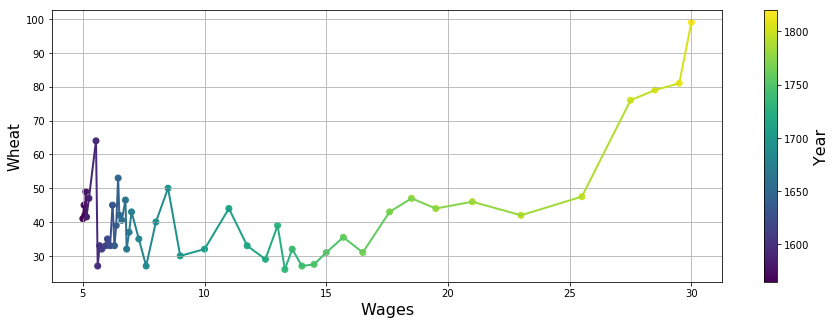

In [11]:
# ------------ Purchasing Power per Year ------------ # 
# In another plot, show the two quantities (wheat price, salary) 
# on two different axes, without an explicit time axis.
# Find another way to show the advancement of time in this plot. 
# Which data representation seems clearest to you? Don't hesitate to propose other ones.

# Init figure, and define ticks, labels and grid settings
plt.figure(figsize=(15, 5))

# Plot Year/Purchasing Power Line
plt.scatter(data['Wages'], data['Wheat'], c=data['Year'], cmap='viridis')

# Set the labels of the coordinates X and Y, and the intervals of the ticks
plt.xlabel('Wages', size=16)
plt.ylabel('Wheat', size=15)
#plt.xticks(np.arange(min(data['Year']), max(data['Year'])+10, 10))

# Set a grid
plt.grid(which='both')

# Map from data points from the YEAR variable to colors
points = np.asarray([data['Wages'].to_numpy(), data['Wheat'].to_numpy()]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(data['Year']), max(data['Year']))
lc = LineCollection(segments=segments, norm=norm, cmap='viridis')

# Set the values used for colormapping and set the colored line
lc.set_array(data['Year'])
lc.set_linewidth(2)
ax = plt.gca()
line = ax.add_collection(lc)
colorbar = plt.colorbar(line, ax=ax)
colorbar.set_label('Year', size=16)

# Show figure
plt.show()

We used color to represent the year in the Figure. The graph allows to visualise that there is a sequence in terms of the Wages: with each year, the wages were higher. This is not true for the Wheat price, specifially in the 1600 to 1750. The price of the Wheat was stabilized for almos 150 years aproximately. However, it started to increase after 1750 aprox. This corresponds to the analysis of the previous Figure, in which we identified that the purchase power started to decrease after 1785, this could be given by the rise of the Wheat price in spite of ever-growing Wages.

### Extra: Lets predict things ok?
In this extra section, we apply the [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) to predict what may happen in the future, given the historical data that we currently have. We will specifically predict purchasing power, based on data defined for the first graph of exercise 3 (column ```data['Purchasing Power']``` from our dataframe).

#### Dependencies 
- statsmodels ver. 0.11.1
- sklearn ver. 0.13.2

In [12]:
# ------------ Installation ------------ # 
# Install the libraries we will use: statsmodels and scikit-learn
!pip install -U statsmodels
!pip install -U sklearn

Requirement already up-to-date: statsmodels in /opt/conda/lib/python3.6/site-packages (0.11.1)
Requirement already up-to-date: sklearn in /opt/conda/lib/python3.6/site-packages (0.0)


In [13]:
# ------------ Imports ------------ # 
import statsmodels
import sklearn
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# Now lets print the version of the libraries that we use in this notebook
print('Statsmodels version:', statsmodels.__version__)
print('Scikit-learn version:', sklearn.__version__)

Statsmodels version: 0.11.1
Scikit-learn version: 0.19.2


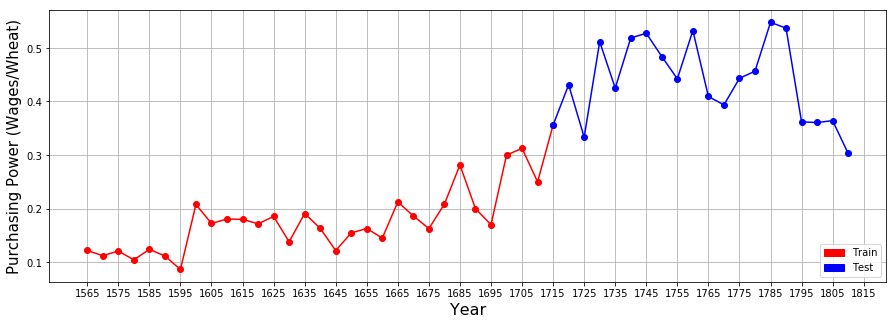

In [14]:
# ------------ Dataset pre-processing and visualization ------------ # 
# Split the dataset into train and test sets, we use the last num_test data points for testing
data = data.dropna() # In this ocassion we remove the NaNs from the dataset
num_test = 20 # Here we define how many of the last data points we will use as dataset for testing the model 
X_train = np.asarray(data['Purchasing Power'][:-num_test])
X_test = np.asarray(data['Purchasing Power'][-num_test:])

# Show the dataset distribution (train vs test), note that we still use the original dataframe to plot (for simplicity)
plt.figure(figsize=(15, 5))
plt.plot(data['Year'][:-(num_test-1)], data['Purchasing Power'][:-(num_test-1)], 'o-', color='red')
plt.plot(data['Year'][-num_test:], data['Purchasing Power'][-num_test:], 'o-', color='blue')
plt.xlabel('Year', size=16)
plt.ylabel('Purchasing Power (Wages/Wheat)', size=15)
plt.xticks(np.arange(min(data['Year']), max(data['Year'])+10, 10))
plt.grid(which='both')
train_patch = mpatches.Patch(color='red', label='Train')
test_pach = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[train_patch, test_pach], loc='lower right')
plt.show()

In [15]:
# ------------ ARIMA model ------------ # 
# Train and test the predictive model
# The metric used to test the model is the Mean Squared Error (MSE)
h = [x for x in X_train]
predictions = list()
for t in range(len(X_test)):
    model = ARIMA(h, order=(2,1,0)).fit(disp=0) # ARIMA parameters were defined emipirically
    y = model.forecast()[0]
    predictions.append(y)
    h.append(X_test[t])
error = mean_squared_error(X_test, predictions)
print('Test MSE: %.3f' % error)

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

Test MSE: 0.007


Note that first, we use the full train dataset (```X_train```) to train the ARIMA model. After, we predict the next data point (time $t$). Then we add this predicted point to the train dataset and re-train the model to predict the following data point (time $t+1$) until we reach the last data point from the test set.

Once we have the trained model with its predictions, we visualize the original data points and the predicted values.

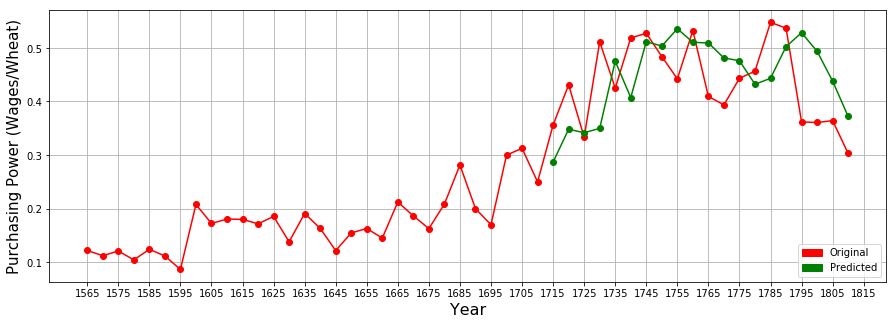

In [16]:
# ------------ Visualize predictions ------------ # 
# Same plot but now with predictions in green
plt.figure(figsize=(15, 5))
plt.plot(data['Year'], data['Purchasing Power'], 'o-', color='red')
plt.plot(data['Year'][-num_test:], predictions, 'o-', color='green')
plt.xlabel('Year', size=16)
plt.ylabel('Purchasing Power (Wages/Wheat)', size=15)
plt.xticks(np.arange(min(data['Year']), max(data['Year'])+10, 10))
plt.grid(which='both')
train_patch = mpatches.Patch(color='red', label='Original')
test_pach = mpatches.Patch(color='green', label='Predicted')
plt.legend(handles=[train_patch, test_pach], loc='lower right')
plt.show()

We were able to train a model with a mean squared error of 0.007. The graph shows that it the predicted data points follow a similar trend (compared to the original test data points, although not without error) based on the historical data used to train the model (train dataset). In the future, other predictive models could be used to improve the forecasting results.